In [ ]:
using HarmonicBalance
@variables α, ω, ω0, F, t, T, η, x(t) # declare constant variables and a function x(t)
diff_eq = DifferentialEquation(d(x,t,2) + ω0*x + α*x^3 + η*d(x,t)*x^2 ~ F*cos(ω*t), x)
add_harmonic!(diff_eq, x, ω) # specify the ansatz x = u(T) cos(ωt) + v(T) sin(ωt)

# implement ansatz to get harmonic equations
harmonic_eq = get_harmonic_equations(diff_eq, slow_time=T, fast_time=t)

problem = Problem(harmonic_eq) # a steady-state problem

fixed = ParameterList(α => 1., ω0 => 1.0, F => 0.01, η=>0.1)   # fixed parameters
swept = ParameterRange(ω => LinRange(0.9, 1.2, 100))         # range of parameter values
solutions = get_steady_states(problem, swept, fixed)

Tracking 9 paths... 100%|███████████████████████████████| Time: 0:00:07
  # paths tracked:                  9
  # non-singular solutions (real):  3 (1)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         3 (1)


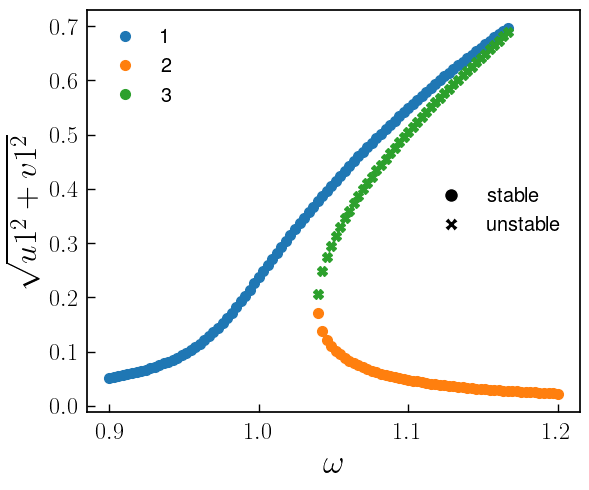

In [32]:
plot_1D_solutions(solutions, x="ω", y="sqrt(u1^2 + v1^2)");
HarmonicBalance.savefig("DuffingPlot.pdf")